# 01-Data Exploration

In this notebook, we will:

1. **Verify our working directory** to ensure we are in the project root.
2. **Import required libraries** and define paths to our processed data (train/val/test, real vs. AI).
3. **Count the number of images** in each split and class (train_real, train_ai, etc.).
4. **Visualize the distribution** of image counts with a bar plot.
5. **Display random samples** from the training set (real vs. AI).
6. **Display a few validation images** to confirm that preprocessing (resizing, normalization) occurred correctly.

By the end, we should be confident that our data pipeline produced the correct file structure and that the images look as expected.


## 1. Verify Working Directory & Define Data Paths

In the next combined code cell, we will:

- Check (and if needed, set) the notebook’s working directory to the project root (`real-vs-ai-face-classifier`).  
- Import all necessary packages (`pathlib`, `matplotlib`, etc.).  
- Define `Path` objects for each of the six processed‐data folders:
  - `data/processed/train/real/`
  - `data/processed/train/ai/`
  - `data/processed/val/real/`
  - `data/processed/val/ai/`
  - `data/processed/test/real/`
  - `data/processed/test/ai/`

These directories should already contain our resized 224×224 images after running preprocessing on all ~400 000 raw faces.


In [3]:
# Ensure working directory is project root
import os
os.chdir(r"C:\Users\mykol\Desktop\projects\real-vs-ai-face-classifier")
print("Current working directory:", os.getcwd())
# Imports and define processed data paths
import random
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

processed_dir = Path("data/processed")
train_real_dir = processed_dir / "train" / "real"
train_ai_dir   = processed_dir / "train" / "ai"
val_real_dir   = processed_dir / "val" / "real"
val_ai_dir     = processed_dir / "val" / "ai"
test_real_dir  = processed_dir / "test" / "real"
test_ai_dir    = processed_dir / "test" / "ai"


Current working directory: C:\Users\mykol\Desktop\projects\real-vs-ai-face-classifier


## 2. Count Images in Each Split and Class

Now that our folder paths are defined, we tally how many images exist in each category:

- `train/real`, `train/ai`  
- `val/real`, `val/ai`  
- `test/real`, `test/ai`  

A correct 70/15/15 train/val/test split of ~203 k real vs. ~198 k AI faces should yield (approximately):

- ~142 k real and ~138 k AI in `train/…`  
- ~30 k real and ~29 k AI in `val/…`  
- ~30 k real and ~30 k AI in `test/…`

Confirming these counts ensures our preprocessing script executed correctly.


In [5]:
def count_images(folder: Path):
    return sum(1 for _ in folder.glob("*.jpg")) + sum(1 for _ in folder.glob("*.jpeg")) + sum(1 for _ in folder.glob("*.png"))

counts = {
    "train_real": count_images(train_real_dir),
    "train_ai":   count_images(train_ai_dir),
    "val_real":   count_images(val_real_dir),
    "val_ai":     count_images(val_ai_dir),
    "test_real":  count_images(test_real_dir),
    "test_ai":    count_images(test_ai_dir)
}

for k, v in counts.items():
    print(f"{k}: {v}")


train_real: 141819
train_ai: 138814
val_real: 30390
val_ai: 29746
test_real: 30390
test_ai: 29746


## 3. Visualize Image Counts with a Bar Chart

We plot a simple bar chart with six bars (train_real, train_ai, val_real, val_ai, test_real, test_ai) to:

- Confirm the ~70/15/15 ratio in each split.  
- Verify that “real” and “AI” are roughly balanced within each split.

This quick visualization highlights any major imbalance or incorrect folder population before proceeding to training.


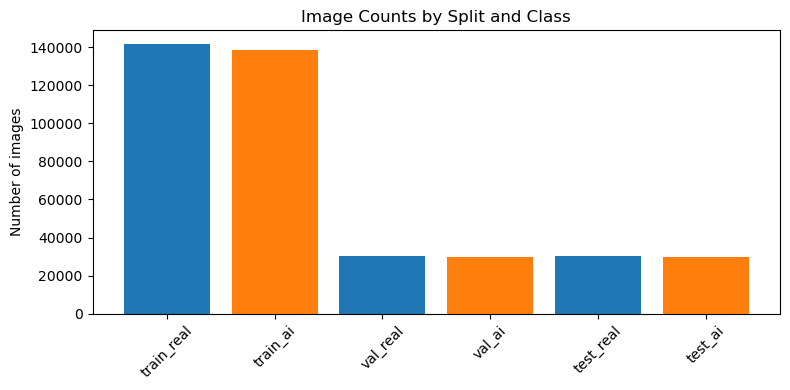

In [7]:
labels = ["train_real", "train_ai", "val_real", "val_ai", "test_real", "test_ai"]
values = [counts[label] for label in labels]

plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Image Counts by Split and Class")
plt.tight_layout()
plt.show()

## 4. Display Random Samples from the Training Set

Next, we randomly select four “real” images and four “AI” images from the training folders and display them in a 2×4 grid. This allows us to verify:

1. Each image is a valid 224×224 RGB face (no corruption or unexpected dimensions).  
2. The “real” images look like CelebA‐style photos, and the “AI” images look like GAN outputs.  

A visual sanity check helps catch any preprocessing errors that might not be obvious from counts alone.


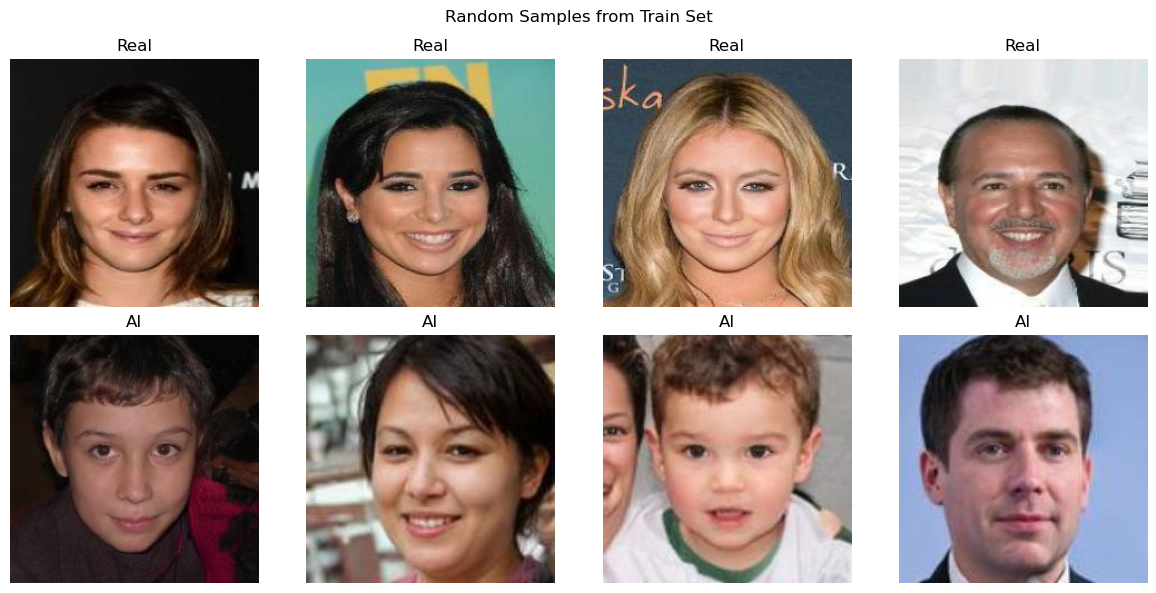

In [9]:
def show_random_samples(real_dir, ai_dir, n_per_class=4):
    real_imgs = list(real_dir.glob("*.*"))
    ai_imgs   = list(ai_dir.glob("*.*"))
    samples = random.sample(real_imgs, n_per_class) + random.sample(ai_imgs, n_per_class)
    titles = ["Real"] * n_per_class + ["AI"] * n_per_class

    plt.figure(figsize=(12, 6))
    for i, (img_path, title) in enumerate(zip(samples, titles), 1):
        img = mpimg.imread(str(img_path))
        ax = plt.subplot(2, n_per_class, i)
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(title)
    plt.suptitle("Random Samples from Train Set")
    plt.tight_layout()
    plt.show()

show_random_samples(train_real_dir, train_ai_dir, n_per_class=4)

## 5. Inspect a Few Validation Images

Finally, we display five random images from `val/real` and five from `val/ai` (separate rows). This confirms that preprocessing (resizing and saving) succeeded for our held‐out data and that no files are missing or corrupted. Once these images look correct, we are ready to move on to model training.


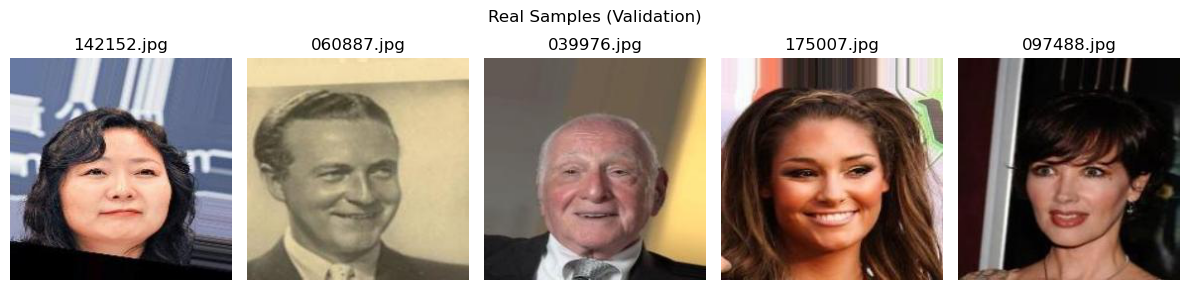

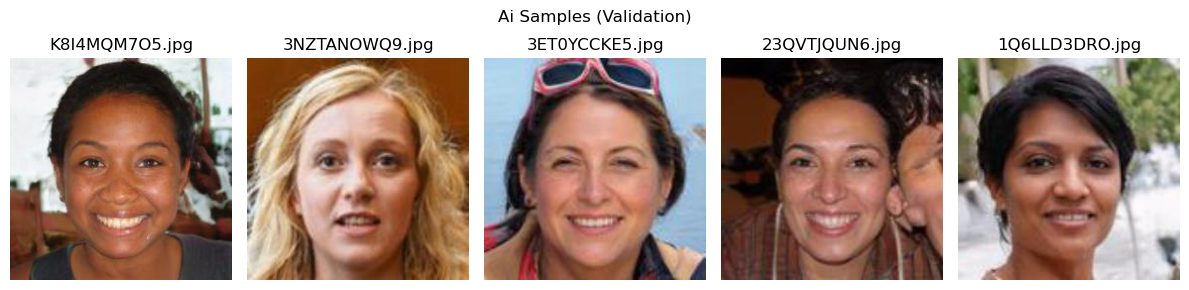

In [11]:
import numpy as np

def show_preprocessed_samples(val_dir, n=5):
    sample_imgs = random.sample(list(val_dir.glob("*.*")), n)
    plt.figure(figsize=(12, 3))
    for i, img_path in enumerate(sample_imgs, 1):
        img = mpimg.imread(str(img_path))
        ax = plt.subplot(1, n, i)
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(img_path.name)
    plt.suptitle(f"{val_dir.parts[-1].capitalize()} Samples (Validation)")
    plt.tight_layout()
    plt.show()

show_preprocessed_samples(val_real_dir, n=5)
show_preprocessed_samples(val_ai_dir,   n=5)